# `P` mode's Array Values
In this notebook, I want to find out how `P` mode stores the images' values. More precisely, I want to know, if it stores only `256` values per pixel, which `256` RGB values they correspond to.

We shall be using the example images under `../../example_images/`

In [1]:
!ls ../../example_images/

codelearn.png  color_on_terminal.png  cs224n.png


In [2]:
%matplotlib inline
from PIL import Image
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

Let's first read our images, convert them to `P` mode, and finally put them into a list `images`.

In [15]:
example_dir = Path("../../example_images/")
images = []
for path in [example_dir / "codelearn.png",
             example_dir / "color_on_terminal.png",
             example_dir / "cs224n.png",
            ]:
    image_PIL = Image.open(path)
    if "RGB" in image_PIL.mode:
        image_RGB = image_PIL
        image_P = image_RGB.convert("P")
    elif "P" in image_PIL.mode:
        image_P = image_PIL
        image_RGB = image_P.convert("RGB")
    else:
        raise Exception(f"{image_PIL} is ni P ni RGB.")
    images.append({
        "RGB": image_RGB,
        "P": image_P,
    })
images

[{'RGB': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1918x1049 at 0x7F1987276D90>,
  'P': <PIL.Image.Image image mode=P size=1918x1049 at 0x7F197F2F6350>},
 {'RGB': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1264x740 at 0x7F197F14BA90>,
  'P': <PIL.Image.Image image mode=P size=1264x740 at 0x7F197F2E9B10>},
 {'RGB': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1266x761 at 0x7F197F14BC90>,
  'P': <PIL.Image.Image image mode=P size=1266x761 at 0x7F197F14BD50>}]

In [16]:
np.asarray(images[0]["P"])

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 96, 96, ..., 96, 53,  0],
       [ 0, 96, 96, ..., 11, 95,  0],
       ...,
       [16, 53, 53, ..., 46, 53, 53],
       [47, 96, 53, ..., 60, 53, 53],
       [16, 46, 17, ..., 46, 17, 46]], dtype=uint8)

In [17]:
_.shape

(1049, 1918)

We can inspect the corresponding RGB values by

- converting the `Image` object back to `RGB` mode
- then by using `np.asarray`

In [18]:
np.asarray(images[0]["P"].convert("RGB"))

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [102, 102, 102],
        [ 51,  51,  51],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [ 51,   0,   0],
        [ 51, 102, 102],
        [  0,   0,   0]],

       ...,

       [[  0,  51,   0],
        [ 51,  51,  51],
        [ 51,  51,  51],
        ...,
        [  0,   0,  51],
        [ 51,  51,  51],
        [ 51,  51,  51]],

       [[ 51,   0,  51],
        [102, 102, 102],
        [ 51,  51,  51],
        ...,
        [102, 102,  51],
        [ 51,  51,  51],
        [ 51,  51,  51]],

       [[  0,  51,   0],
        [  0,   0,  51],
        [ 51,  51,   0],
        ...,
        [  0,   0,  51],
        [ 51,  51,   0],
        [  0,   0,  51]]

Let's really show these images in order to inspect less blindly.

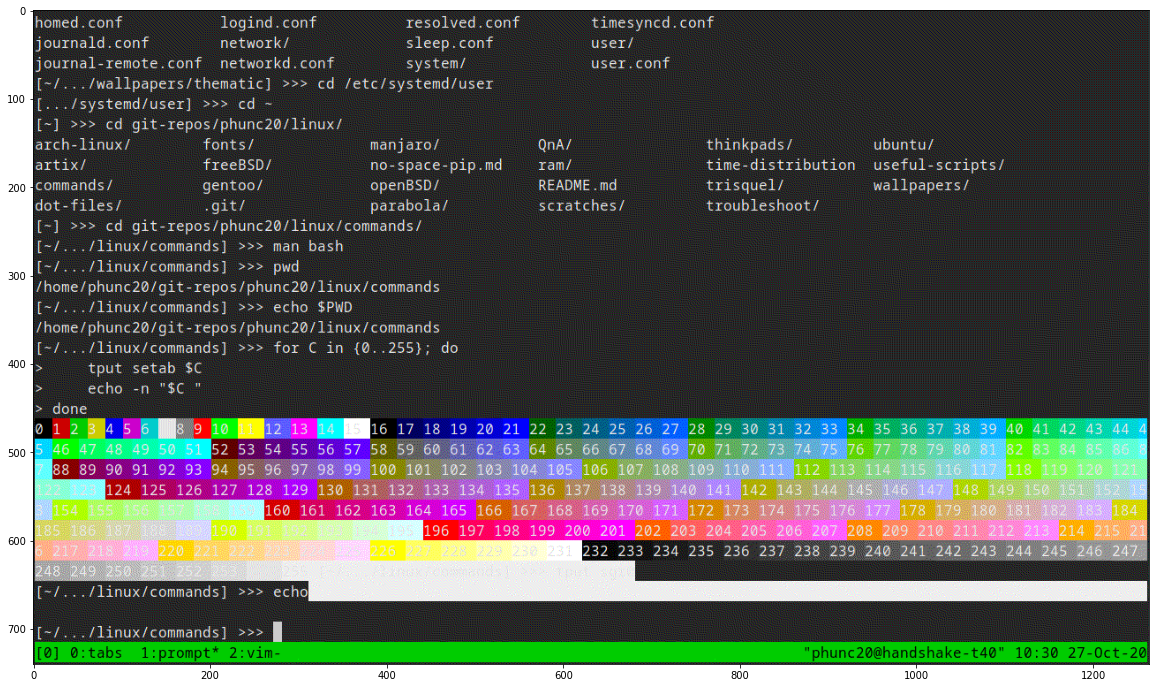

In [39]:
plt.figure(figsize=(20, 30));
#plt.figure(dpi=500);
plt.imshow(np.asarray(images[1]["P"].convert("RGB")));

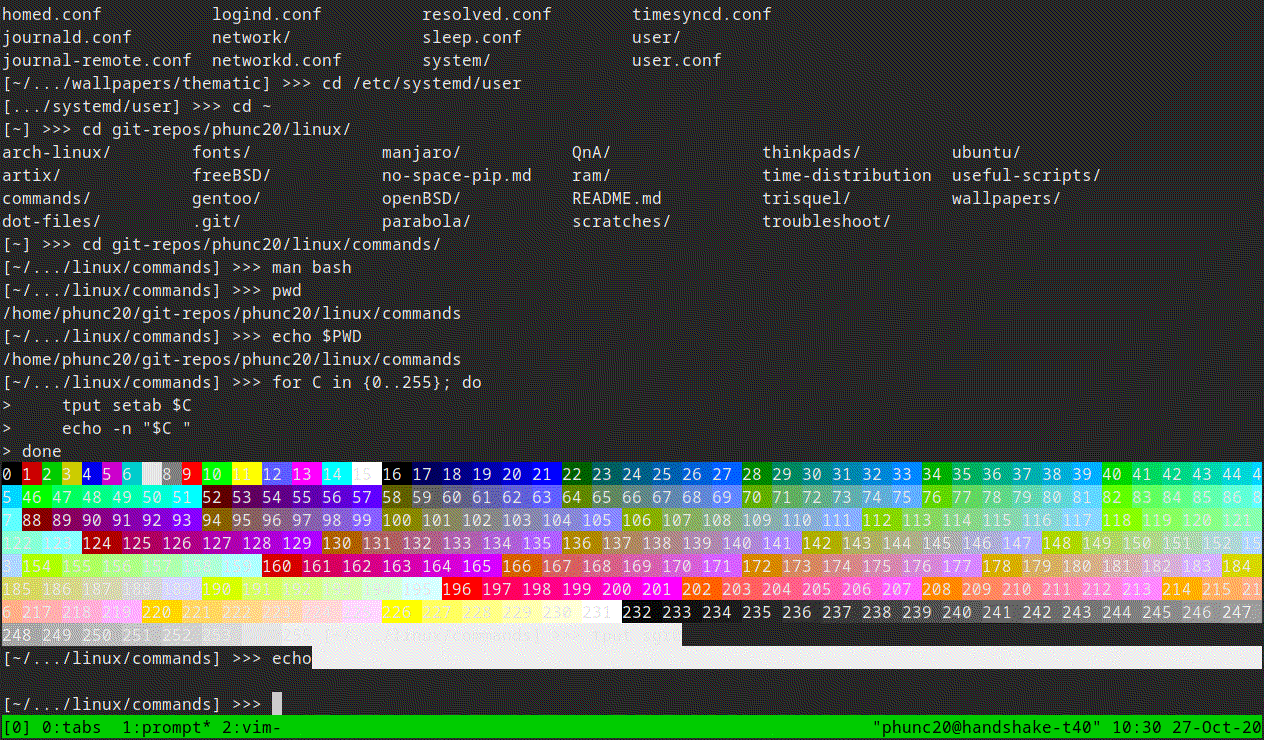

In [20]:
images[1]["P"]

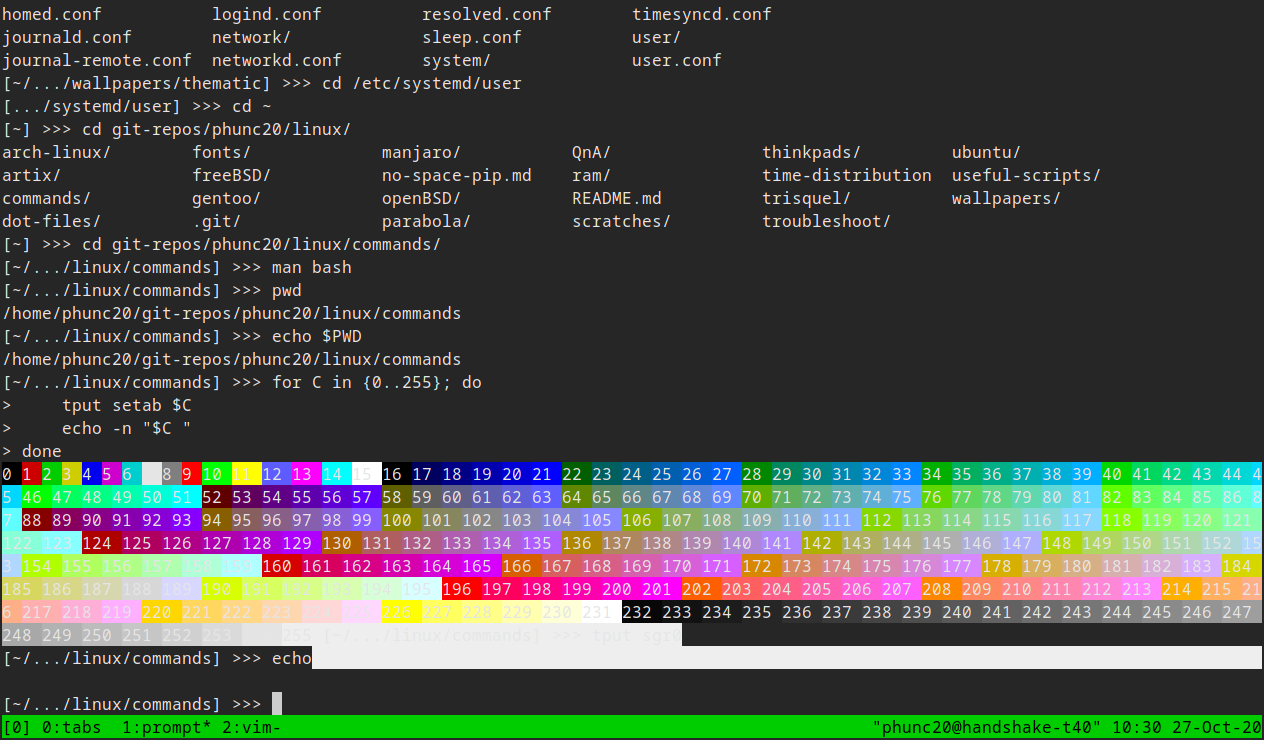

In [21]:
images[1]["RGB"]

**(?)** We could notice that there is a severe degradation (e.g. the background is uglier) in the `RGB->P->RGB` image.

- Why? What went wrong?
- Would the same degradation persist had we saved into a file and read by `cv2.imread`?

**(R)** This seems to be `dpi`-related. Once replace the, say `dpi=500`, by `figsize=(20,30)`, things
come back wihtout problems.

In [23]:
np.array_equal(np.asarray(images[1]["P"].convert("RGB")), np.asarray(images[1]["RGB"]))

False

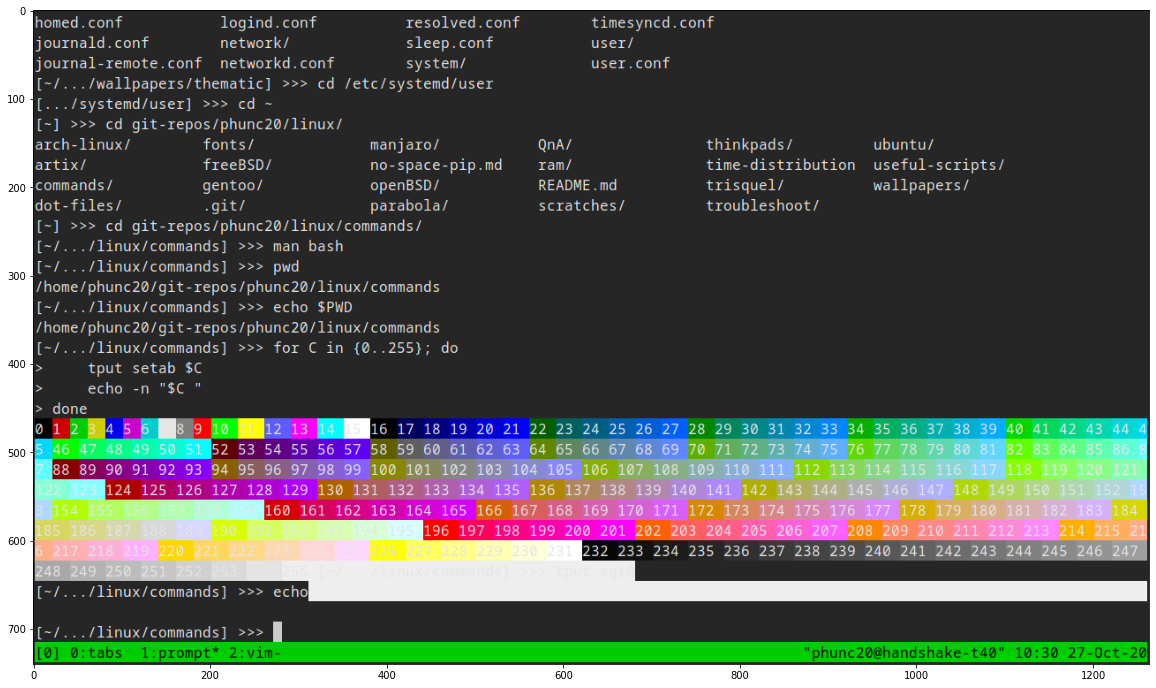

In [40]:
plt.figure(figsize=(20, 30));
plt.imshow(np.asarray(images[1]["RGB"]));

In [28]:
images

[{'RGB': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1918x1049 at 0x7F1987276D90>,
  'P': <PIL.Image.Image image mode=P size=1918x1049 at 0x7F197F2F6350>},
 {'RGB': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1264x740 at 0x7F197F14BA90>,
  'P': <PIL.Image.Image image mode=P size=1264x740 at 0x7F197F2E9B10>},
 {'RGB': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1266x761 at 0x7F197F14BC90>,
  'P': <PIL.Image.Image image mode=P size=1266x761 at 0x7F197F14BD50>}]

Is saving to file in P mode and read back using cv2 the same as P->RGB?
True


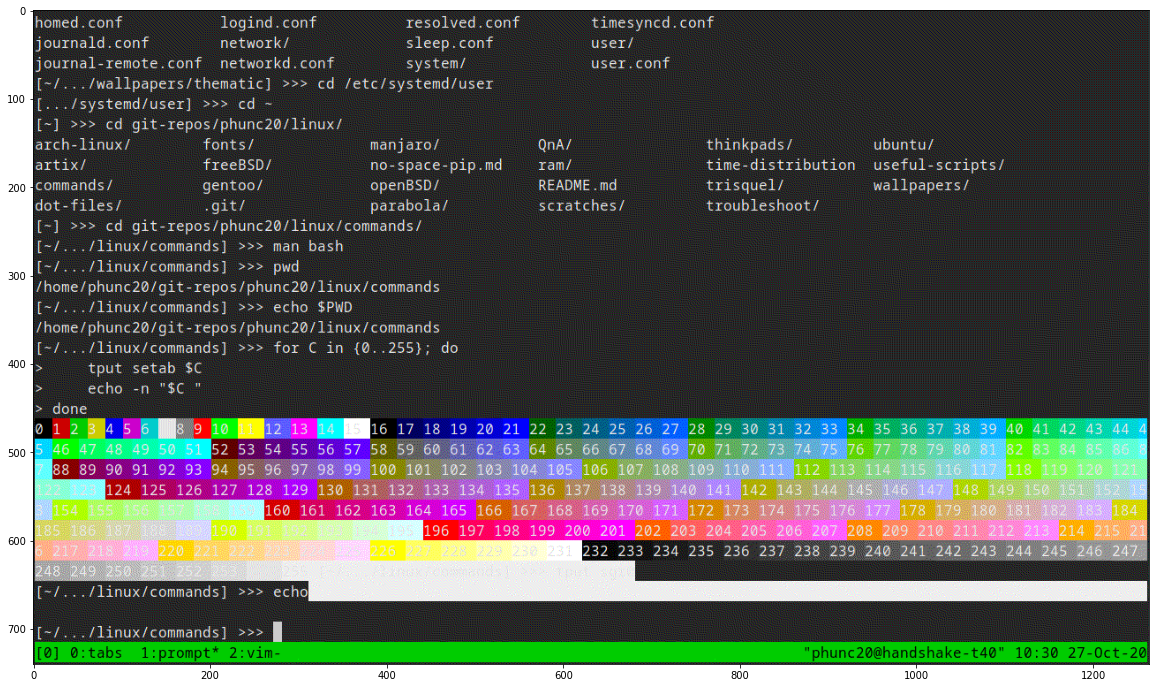

In [46]:
import cv2
temp_PNG_path = Path("temp.png")
images[1]["P"].save(temp_PNG_path)
image_cv2 = cv2.imread(str(temp_PNG_path))
#plt.figure(dpi=300);
plt.figure(figsize=(20, 30));
print("Is saving to file in P mode and read back using cv2 the same as P->RGB?")
print(np.array_equal(image_cv2[...,::-1], np.asarray(images[1]["P"].convert("RGB"))))
plt.imshow(image_cv2[...,::-1]);
![ -f $temp_PNG_path ] && rm $temp_PNG_path

In [49]:
arrays = [{"RGB": np.asarray(D["RGB"]),
           "P": np.asarray(D["P"]),
          } for D in images]
arrays[1]["RGB"].shape

(740, 1264, 3)

In [71]:
images[1]["P"].size, arrays[1]["P"].shape

((1264, 740), (740, 1264))

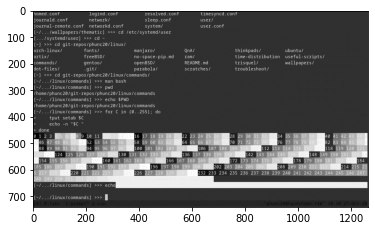

In [72]:
plt.imshow(arrays[1]["P"], cmap="gray");

In [76]:
image = images[1]["P"]
w, h = image.size
array_p = np.asarray(image)
array_rgb = np.asarray(image.convert("RGB"))
D = dict()
for i in range(h):
    for j in range(w):
        p = array_p[i, j]
        if p in D.keys():
            continue
        rgb = array_rgb[i, j]
        D[p] = rgb
D

{53: array([51, 51, 51], dtype=uint8),
 11: array([51,  0,  0], dtype=uint8),
 52: array([ 0, 51, 51], dtype=uint8),
 16: array([ 0, 51,  0], dtype=uint8),
 47: array([51,  0, 51], dtype=uint8),
 17: array([51, 51,  0], dtype=uint8),
 46: array([ 0,  0, 51], dtype=uint8),
 210: array([102, 153, 255], dtype=uint8),
 111: array([255, 204, 102], dtype=uint8),
 125: array([ 51,  51, 153], dtype=uint8),
 187: array([153, 255, 204], dtype=uint8),
 26: array([204, 102,   0], dtype=uint8),
 89: array([ 51,  51, 102], dtype=uint8),
 181: array([153, 204, 204], dtype=uint8),
 182: array([204, 204, 204], dtype=uint8),
 189: array([255, 255, 204], dtype=uint8),
 140: array([204, 153, 153], dtype=uint8),
 18: array([102,  51,   0], dtype=uint8),
 209: array([ 51, 153, 255], dtype=uint8),
 218: array([204, 204, 255], dtype=uint8),
 146: array([204, 204, 153], dtype=uint8),
 104: array([204, 153, 102], dtype=uint8),
 219: array([255, 204, 255], dtype=uint8),
 188: array([204, 255, 204], dtype=uint8),

In [77]:
image2 = images[2]["P"]
w, h = image.size
array_p = np.asarray(image)
array_rgb = np.asarray(image.convert("RGB"))
D2 = dict()
for i in range(h):
    for j in range(w):
        p = array_p[i, j]
        if p in D2.keys():
            continue
        rgb = array_rgb[i, j]
        D2[p] = rgb
D2

{53: array([51, 51, 51], dtype=uint8),
 11: array([51,  0,  0], dtype=uint8),
 52: array([ 0, 51, 51], dtype=uint8),
 16: array([ 0, 51,  0], dtype=uint8),
 47: array([51,  0, 51], dtype=uint8),
 17: array([51, 51,  0], dtype=uint8),
 46: array([ 0,  0, 51], dtype=uint8),
 210: array([102, 153, 255], dtype=uint8),
 111: array([255, 204, 102], dtype=uint8),
 125: array([ 51,  51, 153], dtype=uint8),
 187: array([153, 255, 204], dtype=uint8),
 26: array([204, 102,   0], dtype=uint8),
 89: array([ 51,  51, 102], dtype=uint8),
 181: array([153, 204, 204], dtype=uint8),
 182: array([204, 204, 204], dtype=uint8),
 189: array([255, 255, 204], dtype=uint8),
 140: array([204, 153, 153], dtype=uint8),
 18: array([102,  51,   0], dtype=uint8),
 209: array([ 51, 153, 255], dtype=uint8),
 218: array([204, 204, 255], dtype=uint8),
 146: array([204, 204, 153], dtype=uint8),
 104: array([204, 153, 102], dtype=uint8),
 219: array([255, 204, 255], dtype=uint8),
 188: array([204, 255, 204], dtype=uint8),

In [81]:
for k in D.keys():
    if k not in D2.keys():
        continue
    print(f"{k}: {np.array_equal(D[k], D2[k])}")

53: True
11: True
52: True
16: True
47: True
17: True
46: True
210: True
111: True
125: True
187: True
26: True
89: True
181: True
182: True
189: True
140: True
18: True
209: True
218: True
146: True
104: True
219: True
188: True
147: True
61: True
54: True
88: True
224: True
19: True
216: True
96: True
90: True
217: True
95: True
173: True
124: True
60: True
131: True
25: True
105: True
180: True
183: True
103: True
168: True
175: True
110: True
133: True
174: True
68: True
97: True
167: True
62: True
137: True
138: True
139: True
130: True
132: True
67: True
69: True
145: True
223: True
98: True
166: True
83: True
153: True
55: True
0: True
48: True
152: True
32: True
82: True
141: True
225: True
91: True
24: True
12: True
222: True
118: True
49: True
102: True
169: True
126: True
211: True
177: True
151: True
172: True
119: True
203: True
212: True
94: True
63: True
14: True
34: True
38: True
154: True
190: True
158: True
178: True
15: True
40: True
45: True
198: True
204: True
195:

## Mapping btw `P` Values and `RGB` Values

Let's first see how many diff `P` values we have in one image.

In [50]:
np.unique(np.asarray(images[0]))

array([{'RGB': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1918x1049 at 0x7F1987276D90>, 'P': <PIL.Image.Image image mode=P size=1918x1049 at 0x7F197F2F6350>}],
      dtype=object)

In [51]:
np.arange(256).dtype

dtype('int64')

In [52]:
np.arange(256, dtype=np.uint8).dtype

dtype('uint8')

In [53]:
array_uint8 = np.arange(256, dtype=np.uint8)
array_uint8

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [54]:
image_uint8 = Image.fromarray(array_uint8)

In [63]:
np.repeat(array_uint8[np.newaxis, :], 20, axis=0)

array([[  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       ...,
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255]], dtype=uint8)

In [65]:
Image.fromarray(_, mode="P")

In [73]:
array_int8 = np.arange(256, dtype=np.int8)
array_int8

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127, -128, -127, -126, -125,
       -124, -123, -122, -121, -120, -119, -118, -117, -116, -115, -114,
       -113, -112, -111, -110, -109, -108, -107, -1

In [74]:
image_int8 = Image.fromarray(array_int8)

In [78]:
np.repeat(array_int8[np.newaxis, :], 20, axis=0)

array([[ 0,  1,  2, ..., -3, -2, -1],
       [ 0,  1,  2, ..., -3, -2, -1],
       [ 0,  1,  2, ..., -3, -2, -1],
       ...,
       [ 0,  1,  2, ..., -3, -2, -1],
       [ 0,  1,  2, ..., -3, -2, -1],
       [ 0,  1,  2, ..., -3, -2, -1]], dtype=int8)

In [79]:
K = Image.fromarray(_, mode="P")
K

In [80]:
K.mode

'P'